# Sales Prediction Task

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

## Exploratory Data Analysis (EDA)

In [2]:
# Read dataset
sales_df = pd.read_csv('advertising.csv')

In [3]:
# Check dataset head, statistical measures and important information 
def glimpse(df):
    print(f'Observations: {df.shape[0]} rows \nAttributes: {df.shape[1]} columns')
    print(f'Missing Values: {df.isnull().sum().sum()} values')
    print("-" * 100)
    display(df.head())
    print("-" * 100)
    display(df.describe())
    print("-" * 100)
    display(df.info())
    
df = sales_df
glimpse(sales_df)

Observations: 200 rows 
Attributes: 4 columns
Missing Values: 0 values
----------------------------------------------------------------------------------------------------


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


----------------------------------------------------------------------------------------------------


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

## Data Visualization

### Correlation

**Note:** GitHub does not render interactive graphs. View the static visualizations below or run the code locally for full interactivity.


In [4]:
sales_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


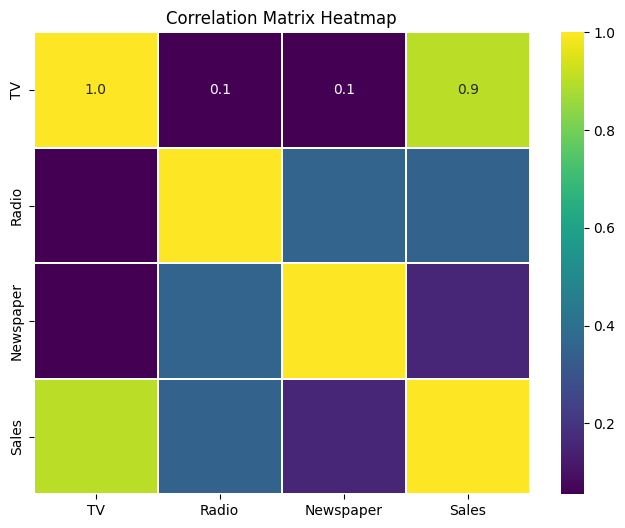

In [5]:
cm = sales_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='viridis', fmt='.1f', linewidths=0.3)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Relationship between variables and target variable

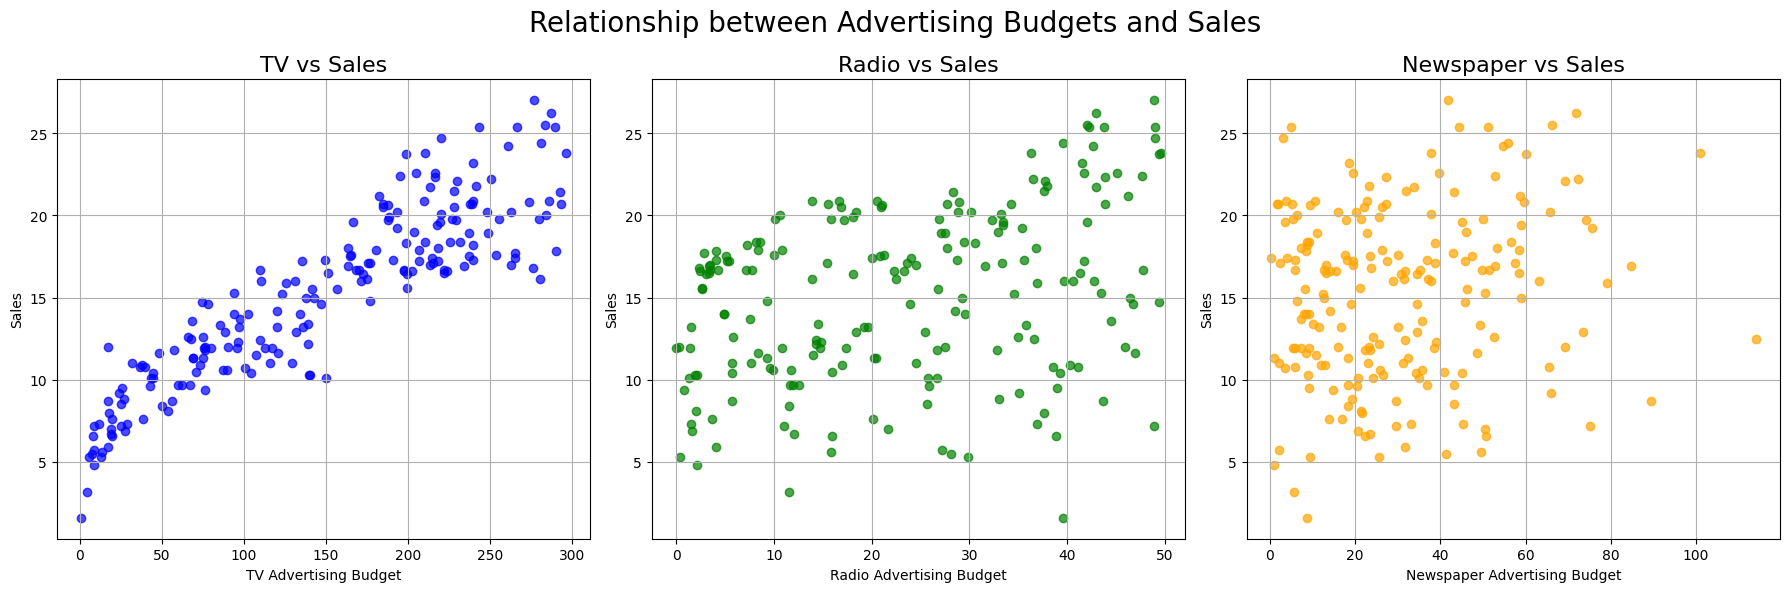

In [6]:
# Plot relationship between variables
plt.figure(figsize=(18,6))

# TV vs Sales
plt.subplot(1,3,1)
plt.scatter(sales_df['TV'],sales_df['Sales'], alpha=0.7, color='blue')
plt.title('TV vs Sales', fontsize=16)
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)


# Radio Vs Sales
plt.subplot(1,3,2)
plt.scatter(sales_df['Radio'],sales_df['Sales'], alpha=0.7, color='green')
plt.title('Radio vs Sales', fontsize=16)
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)


# Newspaper Vs Sales
plt.subplot(1,3,3)
plt.scatter(sales_df['Newspaper'],sales_df['Sales'], alpha=0.7, color='orange')
plt.title('Newspaper vs Sales', fontsize=16)
plt.xlabel('Newspaper Advertising Budget')
plt.ylabel('Sales')
plt.grid(True)

plt.suptitle('Relationship between Advertising Budgets and Sales', fontsize=20)

plt.tight_layout()
plt.show();

* TV and Sales: strong positive correlation - As the budget for TV advertising increases, Sales tend to increase.
* Radio and Sales: moderate positive correlation - Increasing Radio advertising spending is associated with an increase in Sales, but the relationship is not as strong as with TV.
* Newspaper and Sales: weak positive correlation - The impact of Newspaper advertising on Sales is weaker compared to TV and Radio.

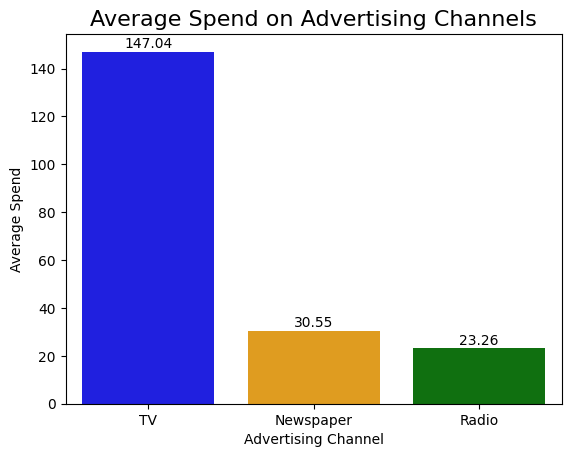

In [7]:
# Avg spend on advertising
avg_spend = df[['TV','Newspaper','Radio']].mean()

colors = ['blue','orange','green']

ax=sns.barplot(x=avg_spend.index, y=avg_spend.values,palette=colors, linewidth=0)

for i, v in enumerate(avg_spend.values):
    ax.text(i,v + 0.2, f'{v:.2f}', va='bottom',ha='center')


plt.title('Average Spend on Advertising Channels', fontsize=16)
plt.xlabel('Advertising Channel', fontsize=10)
plt.ylabel('Average Spend', fontsize=10)
ax.yaxis.grid(False)
plt.show()

## Preprocessing

### Preprocessing: Handling Missing Data (No needed)

In [8]:
# Check  missing data
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Display the number of unique values for each variable
for column in sales_df.columns:
    unique_values = sales_df[column].nunique()
    print(f'{column}:{unique_values}')
    

TV:190
Radio:167
Newspaper:172
Sales:121


### Preprocessing: Assess the correlation between variables and target variable

In [10]:
# Select columns for ML
sales_ML = sales_df[['TV','Radio','Newspaper','Sales']]
sales_ML.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
df = sales_ML

### Preprocessing: Split data

In [12]:
# Split the data X, and y
X = sales_ML.drop('Sales', axis=1)
y = sales_ML['Sales']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Machine Learning

### Model 1: Linear Regression

In [14]:
models = ['Linear Regression', 'Random Forest', 'XGBoost']

mse_scores = []

In [15]:
#Fit Model
lr =  LinearRegression()
lr.fit(X_train, y_train)

#Predict
y_pred_lr = lr.predict(X_test)

#Evaluate
lr_mse = mean_squared_error(y_test,y_pred_lr)
print(f'Mean Squared Error: {lr_mse}')

mse_scores.append(round(lr_mse,3))

Mean Squared Error: 2.907756910271091


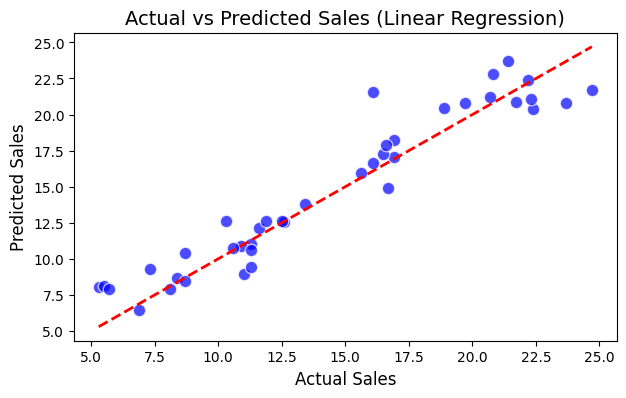

In [16]:
# Visualize Predicted Vs Actual Values
plt.figure(figsize=(7,4))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.7, edgecolors='w', s=80)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.title('Actual vs Predicted Sales (Linear Regression)', fontsize=14);

### Model 2: Random Forest

In [17]:
#Fit model
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

#Predict
y_pred_rf = rf_model.predict(X_test)
                            
#Evaluate
rf_mse = mean_squared_error(y_test,y_pred_rf)
print(f'Mean Squared Error: {rf_mse}')

mse_scores.append(round(rf_mse,3))

Mean Squared Error: 1.3873427500000002


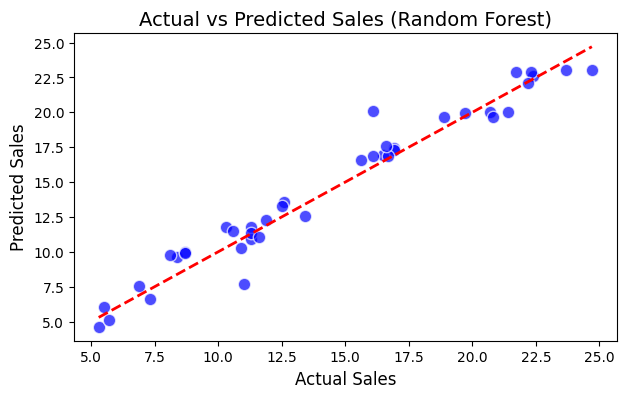

In [18]:
# Visualize Predicted Vs Actual Values
plt.figure(figsize=(7,4))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7, edgecolors='w', s=80)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.title('Actual vs Predicted Sales (Random Forest)', fontsize=14);

### Model 3: XGBoost

In [19]:
#Fit model
xgb_model = GradientBoostingRegressor()
xgb_model.fit(X_train,y_train)

#Predict
y_pred_xgb = xgb_model.predict(X_test)

#Evaluate
xgb_mse = mean_squared_error(y_test,y_pred_xgb)
print(f'Mean Squared Error: {xgb_mse}')

mse_scores.append(round(xgb_mse,3))

Mean Squared Error: 1.2518877421330548


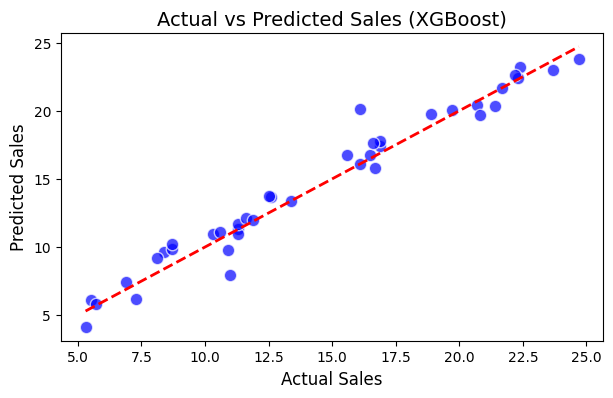

In [20]:
# Visualize Predicted Vs Actual Values
plt.figure(figsize=(7,4))
plt.scatter(y_test, y_pred_xgb, color='blue', alpha=0.7, edgecolors='w', s=80)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.title('Actual vs Predicted Sales (XGBoost)', fontsize=14);

## Algorithms Comparison: Sales Dataset

In [21]:
# Models Comparison
df2 = pd.DataFrame()
df2.index = models
df2['MSE'] = mse_scores
df2

,MSE
Linear Regression,2.908
Random Forest,1.387
XGBoost,1.252


## Operationalizing ML: The Inference Pipeline

In [28]:
# Inference from hypothetical data
TV = int(input('Enter the amount spend on TV Advertising: '))
Radio = int(input('Enter the amount spend on Radio Advertising: '))
Newspaper = float(input('Enter the amount spend on Newspaper Advertising: '))

Enter the amount spend on TV Advertising: 400
Enter the amount spend on Radio Advertising: 50
Enter the amount spend on Newspaper Advertising: 60


In [29]:
# Predict on unseen data
input_list = [TV, Radio, Newspaper]
input_list

Prediction = xgb_model.predict([input_list])
print(f'The predicted Sales based on the given advertising expenditures is {Prediction[0]:,.2f}, the model has an associated Mean Squared Error of {xgb_mse:.3f}.')

The predicted Sales based on the given advertising expenditures is 26.66, the model has an associated Mean Squared Error of 1.252.


## Conclusion

In analyzing the Sales Prediction Dataset, I navigated through data visualization, preprocessing, and machine learning model selection. Among the models evaluated, XGBoost performed the best with the lowest Mean Squared Error (MSE) of 1.245, followed by Random Forest (MSE: 1.458) and Linear Regression (MSE: 2.908).